### Style Transfer
- 딥러닝을 이용해서 이미지에 화풍으로 채색한 것 같은 새로운 이미지를 생성 
   - GAN 으로 대체했으나 학습이 힘들어서 학습 테크닉 중요
   - 논문: [A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576)
   - CNN: VGG16(2014) 기반 (반복되고 명확하고 간단한 구조)
  - convolution 특징을 이용해서 패턴,모양 찾아서 이미지 생성을 최초로 적용

   1. CNN으로 작가의 고유한 추상적 특징을 찾음 
    - 화가의 이미지 '패턴'이 명확, 반복

   2. content reconstruction: 컨텐츠가 구성
    - 단순한 특징만 해서 잘 입혀지지 않아서 higer-layers: 구체적 정보를 잃어 버려서 재구성 ( 사이즈가 증가하고 복잡)

https://www.popit.kr/neural-style-transfer-%EB%94%B0%EB%9D%BC%ED%95%98%EA%B8%B0/

참고: https://www.tensorflow.org/tutorials/generative/style_transfer?hl=ko

- loss function 직접 만들어서 학습**테크닉**
- photo realistic을 위해서 **사람이 지정하지 않은 특징들을 찾아서 학습해서 파악**하여 자연스러움

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [4]:
#이미지 다운로드 
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
# 칸딘스키 화풍
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

## 입력 이미지 시각화
- 이미지 파일 load
 - TF 1 :  바로 불러오기 위해서 numpy format으로 불러오고 나서 tensor로 바꿈
 - TF 2 :  tf.io(file input,output 지원) 이용해서 tensor로 바로 바꿈

In [7]:
def load_img(path_to_img):
    max_dim = 512  #최대 크기 제한 

    img = tf.io.read_file(path_to_img)          # 파일 읽기
    img = tf.image.decode_image(img, channels=3)# 색상 이미지 파일 형식 체크
    img = tf.image.convert_image_dtype(img, tf.float32) #type casting

    shape = tf.cast(tf.shape(img)[:-1], tf.float32) 
    long_dim = max(shape)     #  scale조절
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape) #최대 152
    img = img[tf.newaxis, :]  # (1, h ,w,c)
    return img

In [10]:
# dir(tf.image)   #  decode_bmp,gif, image, jpeg, png 5가지 형식

In [11]:
# 이미지 출력
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0) #차원 축소

    plt.imshow(image)
    if title:
        plt.title(title)

#### squeeze
- 1차원 축 제거해서 차원 축소
> 차원 추가 :reshape,new_axis, expand_dims,flatten, ravel

In [12]:
a = np.arange(24).reshape(1,4,6,1)
b = np.squeeze(a,axis=-1)
print(b,b.shape)

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]
  [18 19 20 21 22 23]]] (1, 4, 6)


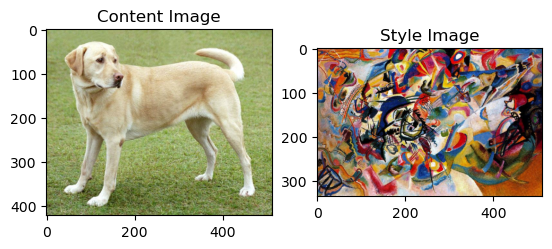

In [15]:
#시각화
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)  #1행 2열중 1번째
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)  #1행 2열중 2번째
imshow(style_image, 'Style Image')

### 전이학습 
-  훈련된 VGG 16 이용해서 학습 구조 이용
1. `tf.hub`: Style Transfer https://tfhub.dev/s?module-type=image-style-transfer
2. `tf.keras.applications`

> - NumPy API : Numpy를 GPU 사용 가능하도록 만듦
   - 참고: https://www.tensorflow.org/guide/tf_numpy?hl=ko


### 1.tf.hub

In [16]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor) #dir __array__ : numpy <-> tensor 

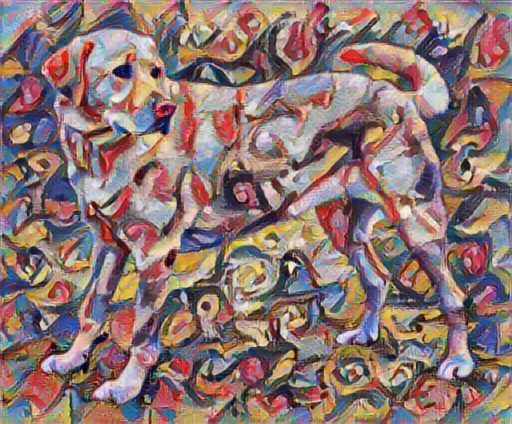

In [20]:
import tensorflow_hub as hub
# Style transfer 모델
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylize_image = hub_model(tf.constant(content_image),tf.constant(style_image))[0]
tensor_to_image(stylize_image)

In [21]:
content_path= tf.keras.utils.get_file('0e5f90af436e4c218343073164a5f657.JPG','https://t1.daumcdn.net/liveboard/holapet/0e5f90af436e4c218343073164a5f657.JPG')
content_image = load_img(content_path)
style_path= tf.keras.utils.get_file('The_Great_Wave_off_Kanagawa.jpg','https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg')
style_image = load_img(style_path)

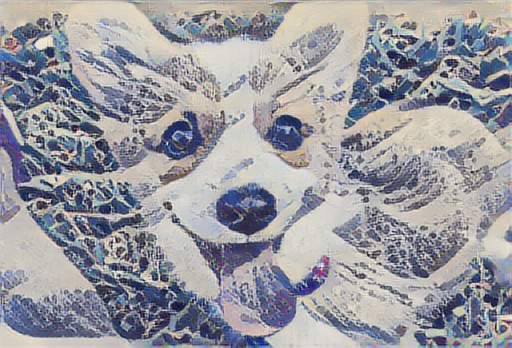

In [22]:
# Style transfer 모델
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)